In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dfN = pd.read_parquet('data/alljumptimesN_1000000.parquet')
dfT = pd.read_parquet('data/alljumptimesT_1000000.parquet')
dfCP = pd.read_parquet('data/countingprocess_1000000.parquet')
dfJT = pd.read_parquet('data/jumptimes_1000000.parquet')

In [3]:
dfJT

,0,1,2,3
0,15.619668,41.511862,16.323764,63.453623
1,16.314091,42.590741,59.588114,86.538281
2,18.263915,52.247475,60.310985,106.947956
3,45.598911,59.520320,67.266356,114.648319
4,59.586643,61.202384,67.276968,137.620210
...,...,...,...,...
333394,999971.563082,NaN,NaN,NaN
333395,999974.756875,NaN,NaN,NaN
333396,999975.133533,NaN,NaN,NaN
333397,999979.629472,NaN,NaN,NaN


In [23]:
#Computation of Lambda

Lambda = 1/dfJT.diff()[1:].mean()
Lambda

0    0.333408
1    0.331392
2    0.166480
3    0.165851
dtype: float64

In [24]:
#Computation of E(dP_t^1|dP_0^1 = 1) / dt 
T = 100 #Horizon d'estiamtion de g_t
dt = 0.5 #Pas de discrétisation de g_t
e = np.zeros(int(T/dt))
s1 = dfJT['0']
batch_beginning = s1[0]
n_batch = 0
for i in range(len(s1)) :
    jumptime = s1[i] - batch_beginning
    if jumptime > T :
        batch_beginning = s1[i]
        n_batch+=1
    else :
        e[int(jumptime/dt)]+=1
    
e = e/n_batch

print(e, n_batch)
    
    

[0.16119001 0.1667876  0.1741474  0.16564735 0.17020835 0.17300715
 0.17269617 0.16896444 0.16440344 0.16699492 0.16896444 0.17176324
 0.16243392 0.16658028 0.17497668 0.17456204 0.16595833 0.15911682
 0.17134861 0.16647662 0.17041567 0.16201928 0.16761688 0.16647662
 0.16616565 0.17787913 0.17342179 0.17000104 0.17051933 0.16388515
 0.16295221 0.16761688 0.16575101 0.16761688 0.17176324 0.16792785
 0.1645071  0.16512906 0.16347051 0.17248886 0.17342179 0.16875713
 0.16554369 0.15745828 0.16523271 0.16865347 0.17062299 0.16626931
 0.17176324 0.16233026 0.17228154 0.17311081 0.15538509 0.16699492
 0.16834249 0.16440344 0.1667876  0.16512906 0.16803151 0.16492174
 0.16709858 0.15693998 0.16823883 0.17134861 0.16740956 0.16471442
 0.17217788 0.17000104 0.1695864  0.16647662 0.16865347 0.16637297
 0.16585467 0.16575101 0.16585467 0.17362911 0.16875713 0.16792785
 0.16284855 0.16461076 0.17031201 0.17031201 0.16699492 0.16326319
 0.16772053 0.17124495 0.15704364 0.17290349 0.17394009 0.1715

In [26]:
#Comptuation of g^11

g = e/dt - Lambda[0]
print(g)

[-1.10284532e-02  1.66736991e-04  1.48863389e-02 -2.11376472e-03
  7.00824212e-03  1.26058372e-02  1.19838822e-02  4.52042207e-03
 -4.60158477e-03  5.81373665e-04  4.52042207e-03  1.01180172e-02
 -8.54063318e-03 -2.47899684e-04  1.65448856e-02  1.57156123e-02
 -1.49180971e-03 -1.51748200e-02  9.28874383e-03 -4.55218021e-04
  7.42287880e-03 -9.36990653e-03  1.82528369e-03 -4.55218021e-04
 -1.07717303e-03  2.23497991e-02  1.34351106e-02  6.59360545e-03
  7.63019713e-03 -5.63817645e-03 -7.50404149e-03  1.82528369e-03
 -1.90644638e-03  1.82528369e-03  1.01180172e-02  2.44723870e-03
 -4.39426643e-03 -3.15035641e-03 -6.46744980e-03  1.15692455e-02
  1.34351106e-02  4.10578540e-03 -2.32108306e-03 -1.84919134e-02
 -2.94303807e-03  3.89846706e-03  7.83751547e-03 -8.69854696e-04
  1.01180172e-02 -8.74795151e-03  1.11546089e-02  1.28131556e-02
 -2.26382801e-02  5.81373665e-04  3.27651205e-03 -4.60158477e-03
  1.66736991e-04 -3.15035641e-03  2.65455704e-03 -3.56499308e-03
  7.88692002e-04 -1.95285

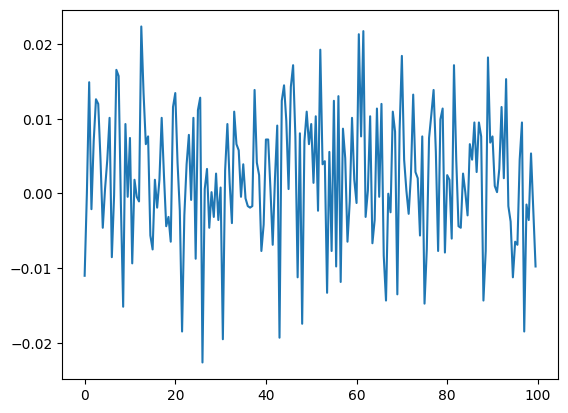

In [29]:
from matplotlib import pyplot as plt

x = np.arange(0,T, dt)
plt.plot(x, g)
plt.show()

In [33]:
#Computation of E(dP_t^1|dP_0^2 = 1), même idée mais en croisé

T = 100 #Horizon d'estiamtion de g_t
dt = 0.5 #Pas de discrétisation de g_t
e = np.zeros(int(T/dt))
s1 = dfJT['0']
s2 = dfJT['1']
n_batch = 0
i = 0
i2 = 0
batch_beginning = s2[i2]
while i<min(len(s1), len(s2)) :
    while s1[i] < batch_beginning : #Recherche du saut de s1 suivant le saut de s2
        i+=1
    jumptime = s1[i] - batch_beginning
    if jumptime > T :
        #Recherche du batch_beginning
        while s2[i2]<s1[i] :
            i2+=1
        batch_beginning = s2[i2] 
        n_batch+=1
    else :
        e[int(jumptime/dt)]+=1
    i+=1
    
e = e/n_batch

print(e, n_batch)

[0.17961373 0.177897   0.16448498 0.17113734 0.16684549 0.16738197
 0.16974249 0.17199571 0.16909871 0.1639485  0.17596567 0.17521459
 0.16995708 0.17135193 0.16920601 0.17103004 0.16866953 0.16169528
 0.16459227 0.17188841 0.1638412  0.16362661 0.17575107 0.16866953
 0.16502146 0.17403433 0.17092275 0.16695279 0.16373391 0.16609442
 0.1751073  0.16995708 0.1693133  0.16190987 0.17167382 0.16566524
 0.17285408 0.17607296 0.1722103  0.16856223 0.16502146 0.16899142
 0.17457082 0.16512876 0.16963519 0.16287554 0.17081545 0.17274678
 0.1693133  0.16984979 0.17403433 0.16652361 0.17328326 0.16201717
 0.17274678 0.1695279  0.16652361 0.16609442 0.17070815 0.17328326
 0.16652361 0.16856223 0.16341202 0.16566524 0.17274678 0.16062232
 0.16534335 0.16781116 0.16148069 0.17070815 0.17092275 0.1639485
 0.17199571 0.17349785 0.1666309  0.16577253 0.16330472 0.16587983
 0.16759657 0.17607296 0.17103004 0.16727468 0.16577253 0.16469957
 0.17296137 0.16437768 0.175      0.16652361 0.17424893 0.16695

In [34]:
#Comptuation of g^12

g = e/dt - Lambda[0]
print(g)

[ 0.025819    0.02238552 -0.00443851  0.00886621  0.00028252  0.00135548
  0.00607651  0.01058295  0.00478896 -0.00551147  0.01852286  0.01702072
  0.0065057   0.00929539  0.00500355  0.00865162  0.00393059 -0.01001791
 -0.00422392  0.01036836 -0.00572606 -0.00615525  0.01809368  0.00393059
 -0.00336555  0.0146602   0.00843703  0.00049711 -0.00594066 -0.00121963
  0.01680612  0.0065057   0.00521814 -0.00958873  0.00993917 -0.002078
  0.01229969  0.01873746  0.01101213  0.003716   -0.00336555  0.00457436
  0.01573316 -0.00315096  0.00586192 -0.00765739  0.00822243  0.01208509
  0.00521814  0.0062911   0.0146602  -0.00036126  0.01315806 -0.00937413
  0.01208509  0.00564733 -0.00036126 -0.00121963  0.00800784  0.01315806
 -0.00036126  0.003716   -0.00658443 -0.002078    0.01208509 -0.01216383
 -0.00272177  0.00221385 -0.01044709  0.00800784  0.00843703 -0.00551147
  0.01058295  0.01358724 -0.00014667 -0.0018634  -0.00679903 -0.00164881
  0.00178467  0.01873746  0.00865162  0.00114089 -0.0

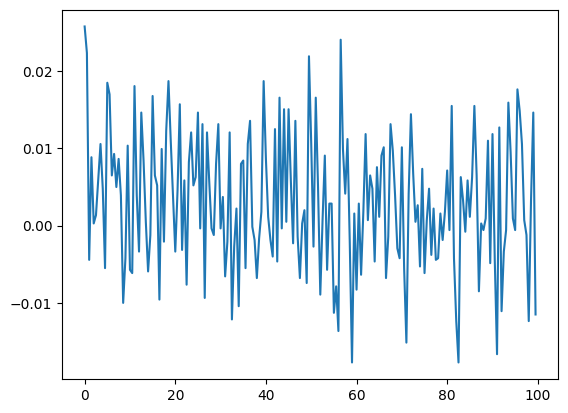

In [35]:
from matplotlib import pyplot as plt

x = np.arange(0,T, dt)
plt.plot(x, g)
plt.show()

In [4]:
def g_ij(s1, s2, T, dt) :
    
    e = np.zeros(int(T/dt))
    n_batch = 0
    i = 0
    i2 = 0
    batch_beginning = s2[i2]
    n_data = min(len(s1), len(s2))
    while ((i<n_data-1) and (i2<n_data - 1)) :
        while ((s1[i] <= batch_beginning) and (i<n_data-1)): #Recherche du saut de s1 suivant le saut de s2, on met un <= pour le cas s1 = s
            i+=1
        jumptime = s1[i] - batch_beginning
        if jumptime > T :
            #Recherche du batch_beginning
            while (s2[i2]<s1[i] and (i2<n_data - 1)) :
                i2+=1
            batch_beginning = s2[i2] 
            n_batch+=1
        else :
            e[int(jumptime/dt)]+=1
        i+=1
    e = e/n_batch
    Lambda = 1/s1.diff()[1:].mean()
    g = e/dt - Lambda
    return g

[ 0.025819    0.02238552 -0.00443851  0.00886621  0.00028252  0.00135548
  0.00607651  0.01058295  0.00478896 -0.00551147  0.01852286  0.01702072
  0.0065057   0.00929539  0.00500355  0.00865162  0.00393059 -0.01001791
 -0.00422392  0.01036836 -0.00572606 -0.00615525  0.01809368  0.00393059
 -0.00336555  0.0146602   0.00843703  0.00049711 -0.00594066 -0.00121963
  0.01680612  0.0065057   0.00521814 -0.00958873  0.00993917 -0.002078
  0.01229969  0.01873746  0.01101213  0.003716   -0.00336555  0.00457436
  0.01573316 -0.00315096  0.00586192 -0.00765739  0.00822243  0.01208509
  0.00521814  0.0062911   0.0146602  -0.00036126  0.01315806 -0.00937413
  0.01208509  0.00564733 -0.00036126 -0.00121963  0.00800784  0.01315806
 -0.00036126  0.003716   -0.00658443 -0.002078    0.01208509 -0.01216383
 -0.00272177  0.00221385 -0.01044709  0.00800784  0.00843703 -0.00551147
  0.01058295  0.01358724 -0.00014667 -0.0018634  -0.00679903 -0.00164881
  0.00178467  0.01873746  0.00865162  0.00114089 -0.0

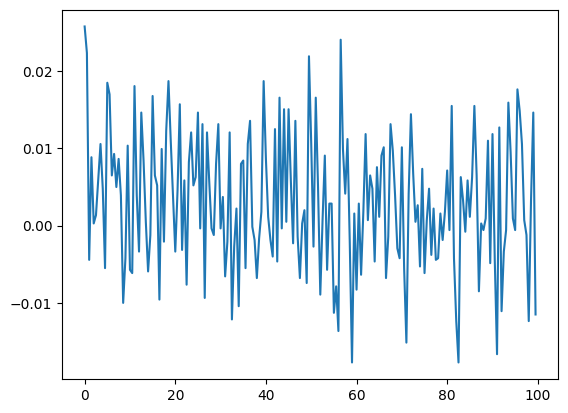

In [7]:
T = 100 #Horizon d'estiamtion de g_t
dt = 0.5 #Pas de discrétisation de g_t
e = np.zeros(int(T/dt))
s1 = dfJT['0']
s2 = dfJT['1']
g12 = g_ij(s1, s2, T, dt)
print(g12)
x = np.arange(0,T, dt)
plt.plot(x, g12)
plt.show()

[ 0.025819    0.02238552 -0.00443851  0.00886621  0.00028252  0.00135548
  0.00607651  0.01058295  0.00478896 -0.00551147  0.01852286  0.01702072
  0.0065057   0.00929539  0.00500355  0.00865162  0.00393059 -0.01001791
 -0.00422392  0.01036836 -0.00572606 -0.00615525  0.01809368  0.00393059
 -0.00336555  0.0146602   0.00843703  0.00049711 -0.00594066 -0.00121963
  0.01680612  0.0065057   0.00521814 -0.00958873  0.00993917 -0.002078
  0.01229969  0.01873746  0.01101213  0.003716   -0.00336555  0.00457436
  0.01573316 -0.00315096  0.00586192 -0.00765739  0.00822243  0.01208509
  0.00521814  0.0062911   0.0146602  -0.00036126  0.01315806 -0.00937413
  0.01208509  0.00564733 -0.00036126 -0.00121963  0.00800784  0.01315806
 -0.00036126  0.003716   -0.00658443 -0.002078    0.01208509 -0.01216383
 -0.00272177  0.00221385 -0.01044709  0.00800784  0.00843703 -0.00551147
  0.01058295  0.01358724 -0.00014667 -0.0018634  -0.00679903 -0.00164881
  0.00178467  0.01873746  0.00865162  0.00114089 -0.0

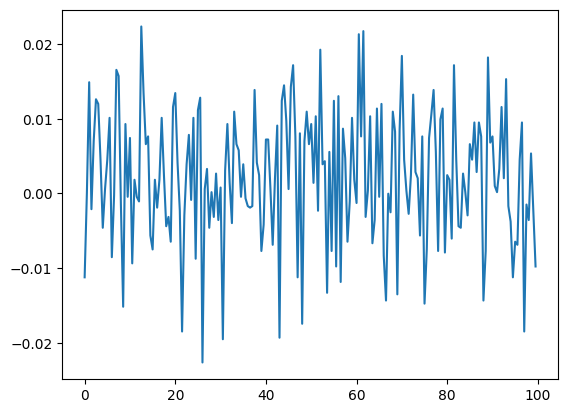

In [8]:
T = 100 #Horizon d'estiamtion de g_t
dt = 0.5 #Pas de discrétisation de g_t
e = np.zeros(int(T/dt))
s1 = dfJT['0']
s2 = dfJT['0']
g11 = g_ij(s1, s2, T, dt)
print(g12)
x = np.arange(0,T, dt)
plt.plot(x, g11)
plt.show()

Nous allons calculer $\Phi_t^{ij}$ de manière itérative de la manière suivante.

1) On choisit un pas de discrétisation dt pour une quadrature trapézoidale (on verra plus tard pour une quadrature gaussienne).
2) On va avoir $\Phi_{s_m}^{ij} = g_{s_m}^{ij} - \sum_k \sum_l w_l g_{s_m -s_l}^{kl} \Phi_{s_l}^{ik}$
Comme $g$ et $\Phi$ sont nuls pour des temps négatifs (ou nul), on peut calculer ce tout de manière itérative de la manière suivante.
On calcule $\Phi_{s_1}^{ij} = g_{s_1}^{ij}$ pour $i,j = 1,...,4$
Puis on calcule $\Phi_{s_2}^{ij} = g_{s_2}^{ij} - \sum_k dt g_{s_2-s_1}^{kj} \Phi_{s_1}{ik}$. Et ainsi de suite
On obtient ainsi $\Phi$ pour $s_1, ..., s_m$, on peut interpoler (de manière plus précise qu'avec une interpolation linéaire) avec la formule.$\Phi_{t}^{ij} = g_{t}^{ij} - \sum_k \sum_l w_l g_{t -s_l}^{kl} \Phi_{s_l}^{ik}$.

Codons

In [25]:
def g_ij(s1, s2, T, dt) :
    
    e = np.zeros(int(T/dt))
    n_batch = 0
    i = 0
    i2 = 0
    batch_beginning = s2[i2]
    n_data = min(len(s1), len(s2))
    while ((i<n_data-1) and (i2<n_data - 1)) :
        while ((s1[i] <= batch_beginning) and (i<n_data-1)): #Recherche du saut de s1 suivant le saut de s2, on met un <= pour le cas s1 = s
            i+=1
        jumptime = s1[i] - batch_beginning
        if jumptime > T :
            #Recherche du batch_beginning
            while (s2[i2]<s1[i] and (i2<n_data - 1)) :
                i2+=1
            batch_beginning = s2[i2] 
            n_batch+=1
        else :
            e[int(jumptime/dt)]+=1
        i+=1
    e = e/n_batch
    Lambda = 1/s1.diff()[1:].mean()
    g = e/dt - Lambda
    return g
    

In [39]:
#Code des g_ij pour T = 100, dt = 0.5

T = 100 #Horizon d'estiamtion de g_t
dt = 0.5 #Pas de discrétisation de g_t
s1 = dfJT['0'].dropna()
s2 = dfJT['1'].dropna()
s3 = dfJT['2'].dropna()
s4 = dfJT['3'].dropna()
g = np.zeros((4,4,int(T/dt)))
for i in range(4) :
    for j in range(4) :
        g[i,j,:] =  g_ij(locals()[f"s{i+1}"], locals()[f"s{j+1}"], T, dt)

In [42]:
g[0,0,:]

array([-1.12357716e-02,  1.66736991e-04,  1.48863389e-02, -2.11376472e-03,
        7.00824212e-03,  1.26058372e-02,  1.19838822e-02,  4.52042207e-03,
       -4.60158477e-03,  5.81373665e-04,  4.52042207e-03,  1.01180172e-02,
       -8.54063318e-03, -2.47899684e-04,  1.65448856e-02,  1.57156123e-02,
       -1.49180971e-03, -1.51748200e-02,  9.28874383e-03, -4.55218021e-04,
        7.42287880e-03, -9.36990653e-03,  1.82528369e-03, -4.55218021e-04,
       -1.07717303e-03,  2.23497991e-02,  1.34351106e-02,  6.59360545e-03,
        7.63019713e-03, -5.63817645e-03, -7.50404149e-03,  1.82528369e-03,
       -1.90644638e-03,  1.82528369e-03,  1.01180172e-02,  2.44723870e-03,
       -4.39426643e-03, -3.15035641e-03, -6.46744980e-03,  1.15692455e-02,
        1.34351106e-02,  4.10578540e-03, -2.32108306e-03, -1.84919134e-02,
       -2.94303807e-03,  3.89846706e-03,  7.83751547e-03, -8.69854696e-04,
        1.01180172e-02, -8.74795151e-03,  1.11546089e-02,  1.28131556e-02,
       -2.26382801e-02,  

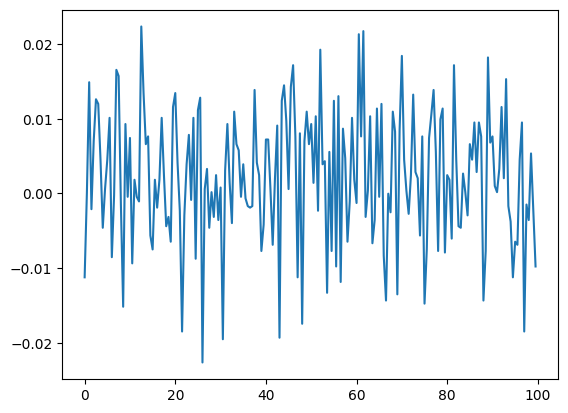

In [44]:
x = np.arange(0,T, dt)
plt.plot(x, g[0,0,:] )
plt.show()

In [48]:
time_steps = int(T/dt)
phi = np.copy(g) #On s'économise le premier terme de phi_t^ij = g_t^ij
for m in range(time_steps) :
    for i in range(4) :
        for j in range(4) :     
            for k in range(4) :
                for l in range(m) :
                    phi[i,j,m] -= dt*g[k,j,m-l]*phi[i,k,l]
                    

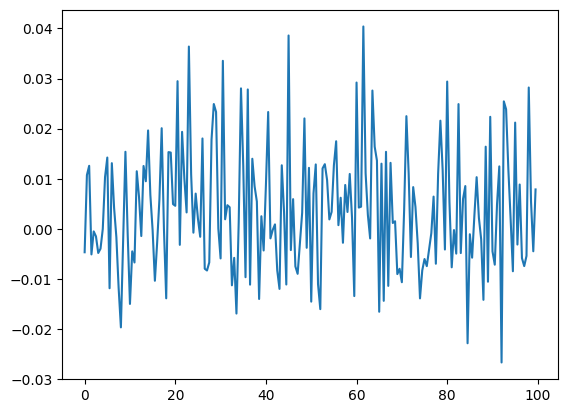

In [56]:
x = np.arange(0,T, dt)
plt.plot(x, phi[0,2,:])
plt.show()